# Analyzing Movie Reviews
[FiveThirtyEight](https://www.fivethirtyeight.com) compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings. After discovering that a few films that weren't good were still rated highly on Fandango, the team investigated and published an article about bias in movie ratings.

## The Dataset
We'll be working with the `fandango_scores.csv` file, which can be downloaded from the [FiveThirtEight Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). It contains data for 147 films from 2015 that have substantive reviews from both critics and consumers. Here are some of the columns found in the dataset:

| Column | Description |
| ------ | ----------- |
| `FILM` | film name |
|`RT_user_norm` | average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale |
|`Metacritic_user_nom` | average user rating from Metacritc, normalized to a 1 to 5 point scale |
|`IMDB_norm` | average user rating from IMDB, normalized to a 1 to 5 point scale |
|`Fandango_Ratingvalue` | average user rating from Fandango, normalized to a 1 to 5 point scale |
|`Fandango_Stars` | the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale) |

Instead of displaying the raw rating, Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The `Fandango_Ratingvalue` column reflects the true average rating while the `Fandango_Stars` column reflects the, displayed, rounded rating."

In [1]:
import pandas as pd
movies = pd.read_csv("fandango_score_comparison.csv")

The primarily focus in this analysis is on the `Metacritic_norm_round` and the `Fandango_Stars` columns, let's see how Fandango and Metacritic differ in terms of review scores.

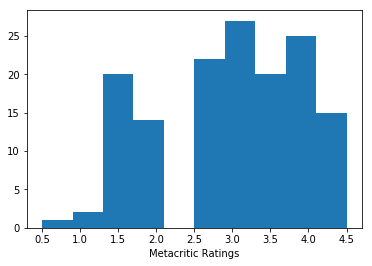

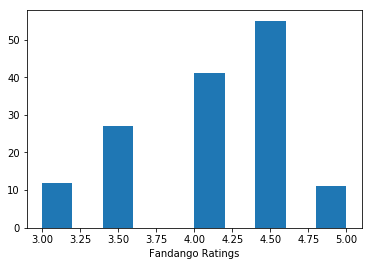

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(movies["Metacritic_norm_round"])
plt.xlabel("Metacritic Ratings")
plt.show()
plt.hist(movies["Fandango_Stars"])
plt.xlabel("Fandango Ratings")
plt.show()

## Fandango vs. Metacritic - Score Comparison
There are no scores below a 3.0 in the Fandango reviews. The Fandango reviews also tend to center around 4.5 and 4.0, whereas the Metacritic reviews seem to center around 2.5 and 3.5.

## Mean, Median, and Standard Deviation
Visually there are differences between the distribution of Metacritic and Fandango scores. Let's use some statistical measures to quantify these differences:

In [3]:
import numpy
fandango_mean = movies["Fandango_Stars"].mean()
fandango_std = movies["Fandango_Stars"].std()
fandango_median = movies["Fandango_Stars"].median()
metacritic_mean = movies["Metacritic_norm_round"].mean()
metacritic_std = movies["Metacritic_norm_round"].std()
metacritic_median = movies["Metacritic_norm_round"].median()

print("Fandango mean: " + str(fandango_mean))
print("Metacritic mean: " + str(metacritic_mean))
print("\t")
print("Fandango median: " + str(fandango_median))
print("Metacritic median: " + str(metacritic_median))
print("\t")
print("Fandango standard deviation: " + str(fandango_std))
print("Metacritic standard deviation: " + str(metacritic_std))

Fandango mean: 4.089041095890411
Metacritic mean: 2.9726027397260273
	
Fandango median: 4.0
Metacritic median: 3.0
	
Fandango standard deviation: 0.5403859779787333
Metacritic standard deviation: 0.9909605613743364


## Fandango vs. Metacritic - Summary Statistics
The median Metacritic score appears higher than the mean Metacritic score because a few very low reviews "drag down" the median. The median Fandango score is lower than the mean Fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

Fandango ratings in general appear to be higher than Metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.


## Disparity Between Fandango and Metacritic Scores
We know the ratings tend to differ, but we don't know which movies tend to be the largest outliers. We can find this by making a scatterplot, then looking at which movies are far away from the others.

Text(0,0.5,'Fandango Score')

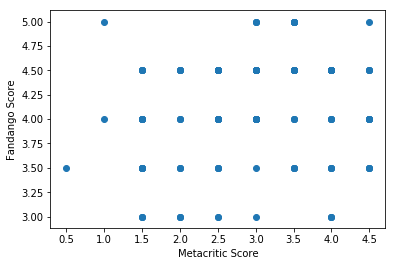

In [4]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.xlabel("Metacritic Score")
plt.ylabel("Fandango Score")

We can create a column in `movies` based on the largest differences between their Metacritic and Fandango ratings.

In [5]:
movies["fm_diff"] = movies["Fandango_Stars"] - movies["Metacritic_norm_round"]
movies["fm_diff"] = numpy.absolute(movies["fm_diff"])
movies.sort_values("fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## Correlations

Let's see what the correlation coefficient between `Fandango_Stars` and `Metacritic_norm_round` is. This will help us determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

In [6]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
print(r_value)

0.178449190739


## Findings 
The correlation (R-value) is actually fairly low. This means that there is no relationship between the Metacritic and Fandango scores. Low correlation between the scores corroborates the idea of Fandango's bias towards high ratings.

## Fandango vs. Metacritic - Methodology
Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating. You can read more about Metacritic's methodology [here](http://www.metacritic.com/about-metascores).

## Predicting Scores
Now we can create a linear regression to see what the predicted Fandango score would be based on the Metacritic score.

In [7]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [8]:
pred_3 = 3 * slope + intercept
print(pred_3)

4.09170715282


Using linear regression, we can predict a movie that got a `3.0` in Metacritic would get a `4.0` on Fandango.

## Finding Residuals
Creating a residual plot can help us visualize how the linear model relates to existing points. However it is important to keep in mind, if the correlation is low, the model might not be very accurate.

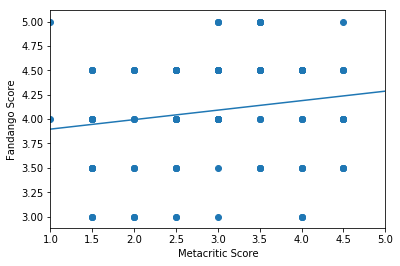

In [9]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept

plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim(1,5)
plt.xlabel("Metacritic Score")
plt.ylabel("Fandango Score")
plt.show()